# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
path=os.getcwd()
df_waether=pd.read_csv(os.path.join(path,'data_weather.csv' ), index_col=None)
#df_waether=df_waether.set_index('Date')#,drop=True)
df_waether=df_waether.drop('Unnamed: 0', axis=1)
df_waether.head(2)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56


In [3]:
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm
tqdm_notebook().pandas(desc="Example Desc")

df_waether=df_waether.sort_values(by='Date' )
df_waether['Date']=df_waether['Date'].progress_apply(lambda x: pd.to_datetime(x))
df_waether['Year']=df_waether['Date'].progress_apply(lambda x: x.year)
df_waether['Year-month']=df_waether['Date'].progress_apply(lambda x: x.year*100+x.month)
df_waether['month-day']=df_waether['Date'].progress_apply(lambda x: 100*x.month+x.day)
df_waether['mm-dd']=df_waether['Date'].progress_apply(lambda x: str(x.month)+'-'+str(x.day) )


df_waether=df_waether.sort_values(by='Date' )
df_waether_2015=df_waether[df_waether['Year']==2015]
df_waether_2015['month-day']=df_waether_2015['Date'].progress_apply(lambda x: 100*x.month+x.day)

df_waether=df_waether[df_waether['Year']!=2015]
df_waether['Date'][1].year
df_waether_max=df_waether[df_waether['Element']=='TMAX']
df_waether_min=df_waether[df_waether['Element']=='TMIN']
df_waether_min.head(2)

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """Entry point for launching an IPython kernel.


c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,ID,Date,Element,Data_Value,Year,Year-month,month-day,mm-dd
60995,USW00004848,2005-01-01,TMIN,0,2005,200501,101,1-1
41309,USC00208080,2005-01-01,TMIN,-39,2005,200501,101,1-1


For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [4]:
listadias=df_waether['month-day'].unique()#.sort()
listadias.sort()

max_grade=[]
min_grade=[]
grade_2015=[]
mmdd=[]
for element in tqdm(listadias):
    mmdd.append(str(df_waether[df_waether['month-day']==element]['mm-dd'].unique()[0])[:2])
    max_grade.append(df_waether[df_waether['month-day']==element]['Data_Value'].max())
    min_grade.append(df_waether[df_waether['month-day']==element]['Data_Value'].min())
    grade_2015.append(df_waether_2015[df_waether_2015['month-day']==element]['Data_Value'].max())

100%|████████████████████████████████████████████████████████████████████████████████| 366/366 [00:05<00:00, 63.91it/s]


## Overview of the data 2005-2014 data

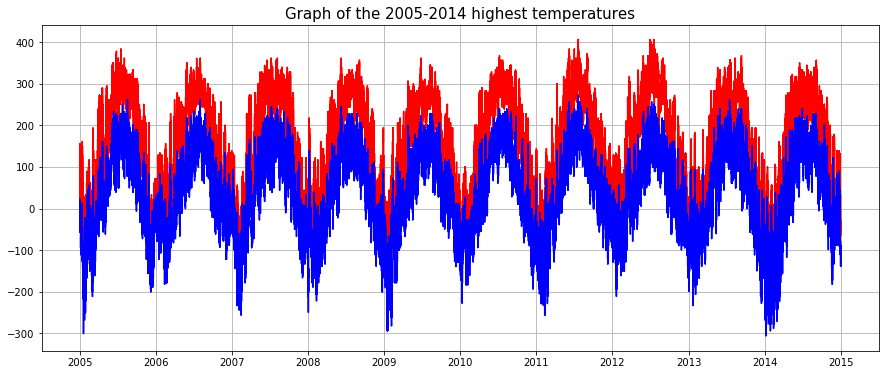

In [5]:
plt.figure(figsize=(15,6))
x_max=df_waether_max['Date']
y_max=df_waether_max['Data_Value']

x_min=df_waether_min['Date']
y_min=df_waether_min['Data_Value']

plt.grid()
plt.title('Graph of the 2005-2014 highest temperatures',size=15)
plt.plot(x_max,y_max, 'red')
plt.plot(x_min,y_min, 'blue')

## Overview of 2015 data

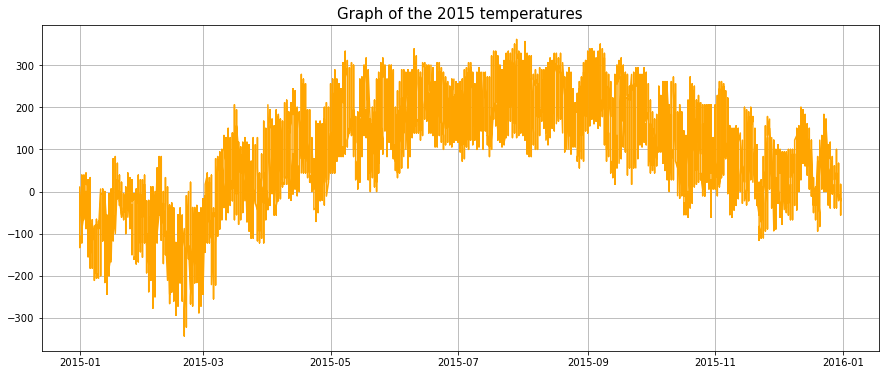

In [6]:
plt.figure(figsize=(15,6))
x_2015=df_waether_2015['Date']
y_2015=df_waether_2015['Data_Value']
plt.grid()
plt.title('Graph of the 2015 temperatures',size=15)
plt.plot(x_2015,y_2015, 'orange')
plt.savefig('2015.png')

## Assigment resolution

In [7]:
# This count the day, create a position por layer, and continue with the other month
cont=0
pos=[0]
month=[]
mm=[]
for element in mmdd: #clea format the '-'
    mm.append(element.split('-')[0])
    
for element in list(range(1,13)):
    cont+=mm.count(str(element))
    pos.append(cont)
    month.append(str(element))
month.append(1)

In [8]:
# this wild create anothe position, for historical days in 2015 on the curve
y1=[iterator/10 for iterator in min_grade]
y2=[iterator/10 for iterator in max_grade]
y3=[iterator/10 for iterator in grade_2015]

critical_day=[]
y3_up=[]
y2_down=[]
day_label=[]
critical_data=[]
for i in range(len(y3)):
    
    if y3[i] > y2[i]: 
        critical_day.append(i)
        if i> 273 : day_label.append(str(listadias[i])[:2]+'-'+str(listadias[i])[2:])
        else: day_label.append(str(listadias[i])[:1]+'-'+str(listadias[i])[1:])
        y3_up.append(y3[i])
        y2_down.append(y2[i])
        
critical_data.append(critical_day)
critical_data.append(day_label)
critical_data.append(y3_up)
critical_data.append(y2_down)
print(len(y2_down))


#Analisis of the best of the most

rank_search=3
great_range=[]
pop_list=[]

critical_top=critical_data.copy()

def topcurve(list_values, itera, rank):
    top=abs(np.std(list_values[itera-rank:itera+rank+1]))
    return (top)

for i in range((rank_search+1), (len(y3_up)-rank_search)):
    if topcurve(critical_day, i, rank_search)< (rank_search**2.5):
        best=max(y3_up[i-rank_search:i+rank_search])
        pivot=y3_up[i-rank_search:i+rank_search].index(best)
        poping=list(range(1+rank_search*2))
        del poping[pivot]
        for element in poping: pop_list.append(i-rank_search+element)
        great_range.append(i-rank_search+  pivot)
#print(pop_list)
#print(great_range)        

pop_list_output = []
for element in pop_list: 
    if element not in pop_list_output: pop_list_output.append(element)
pop_list_output.sort()
#print('pop list:', pop_list_output)
#print('esto es great',great_range)


great_range_output = []
for element in great_range: 
    if element not in great_range_output: great_range_output.append(element)
#print('esto es la primer great out',great_range_output)

repit=[]
maximums=[]

for j in great_range:
    repetitions=great_range.count(j)
    repit.append(repetitions)
    if repetitions >=rank_search**0.5: 
        maximums.append(j)
       #print(j)
        
print('esto es la primer great out', repit)        
print('esto es great',great_range_output)
    #print(pop_list_output)

for element in maximums: 
    if element in pop_list_output: 
        pop_list_output.remove(element)
        
for i in range(len(pop_list_output)):
    y3_up.pop(pop_list_output[i]-i)
    y2_down.pop(pop_list_output[i]-i)
    critical_day.pop(pop_list_output[i]-i)
    day_label.pop(pop_list_output[i]-i)
    #print(i)
len(y2_down)

37
esto es la primer great out [2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 1, 1]
esto es great [9, 10, 15, 16, 18, 19, 20, 21, 22, 28, 29, 30]


11

<Figure size 432x288 with 0 Axes>

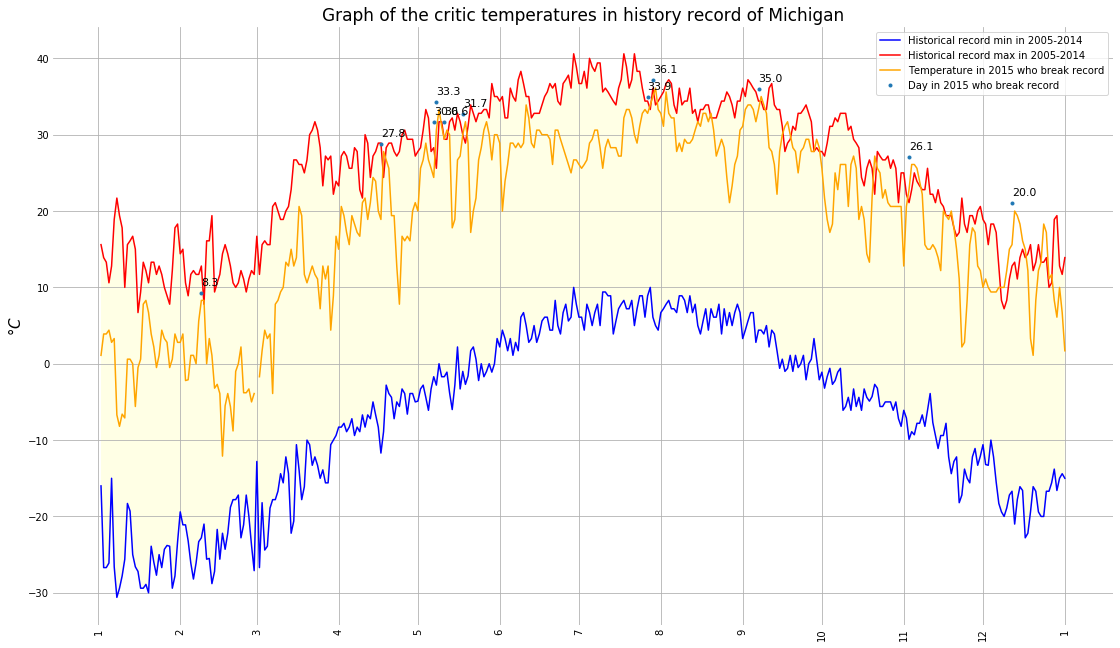

<Figure size 432x288 with 0 Axes>

In [26]:
#create data for the curves
plt.figure()
fig, ax = plt.subplots(figsize=(19,11))

x=list(range(1,len(mmdd)+1))
y1=[iterator/10 for iterator in min_grade]
y2=[iterator/10 for iterator in max_grade]
y3=[iterator/10 for iterator in grade_2015]

ax.plot(x , y1, 'blue')
ax.plot(x , y2, 'red')
ax.plot(x , y3, 'orange')

plt.xticks(pos, month)
plt.tick_params(length  =0.0)# retires the vertical ticks
plt.ylabel('$°C$', size=15).set_rotation(90)

plt.gca().fill_between(x, y1, y2, facecolor='yellow', alpha=0.1)# fill the curve

x = plt.gca().xaxis
for item in x.get_ticklabels():item.set_rotation(90)
    
plt.grid() #creates a grid for better visualizatión of the temperatures
plt.title('Graph of the critic temperatures in history record of Michigan',size=17)

for k in range(len(day_label)):
    ax.annotate(y3_up[k] ,xy=(critical_day[k]-1, y3_up[k]-1), xytext=(critical_day[k],y3_up[k]+2),size=11)

ax.plot(critical_day, [iterator+1 for iterator in y3_up],'o', markersize=3 )

plt.legend(["Historical record min in 2005-2014",
            "Historical record max in 2005-2014 ",
            "Temperature in 2015 who break record",
            "Day in 2015 who break record"],
           loc = (1), frameon = True)

for spine in plt.gca().spines.values(): spine.set_visible(False)
plt.show()
plt.savefig('exercize2.png')

#create data for the curves
plt.figure(figsize=(17,7))
x=list(range(1,len(mmdd)+1))
y1=[iterator/10 for iterator in min_grade]
y2=[iterator/10 for iterator in max_grade]
y3=[iterator/10 for iterator in grade_2015]

plt.plot(x , y1, 'blue')
plt.plot(x , y2, 'red')
plt.plot(x , y3, 'orange')

plt.xticks(pos, month)
plt.tick_params(length  =0.0)# retires the vertical ticks
plt.ylabel('$°C$', size=15).set_rotation(90)

plt.gca().fill_between(x, y1, y2, facecolor='yellow', alpha=0.15)# fill the curve

x = plt.gca().xaxis
for item in x.get_ticklabels():item.set_rotation(90)
    
plt.grid() #creates a grid for better visualizatión of the temperatures
plt.title('Graph of the critic temperatures in history record',size=15)

#bars=plt.xticks(critical_day, day_label)


#red_patch = mpatches.Patch(color='red', label='The red data')
#red_patch = mpatches.Patch(color='blue', label='The red data')

#plt.legend(handles=[red_patch])

for k in range(len(day_label)):
    plt.annotate(y3_up[k] ,xy=(critical_day[k]-1, y3_up[k]-1), xytext=(critical_day[k],y3_up[k]+2),size=7.5)

plt.plot(critical_day, [iterator+1 for iterator in y3_up],'o', markersize=3 )

for spine in plt.gca().spines.values(): spine.set_visible(False)
plt.show()
plt.savefig('exercize2.png')